<a href="https://colab.research.google.com/github/chandraSekar123/ML_Deployment_Django/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from IPython.display import Image
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [0]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [0]:
df = pd.read_csv("decisiontree.csv")


In [0]:
df.head()


,Score,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
df.tail()



,Score,Pass
95,96,1
96,97,1
97,98,1
98,99,1
99,100,1


In [0]:
X_train = df.loc[:, df.columns != 'Pass']
Y_train = df.Pass

In [0]:
Y_train.unique()

array([0, 1])

In [0]:
## chandra code for checking the logic
count=len(Y_train)
col_values=Y_train.unique()
def chandra_entropy(df,targetcol):
  total_entro=0
  for i in col_values:

    
    len1=len(df[df[targetcol]==i])
    ent1=-len1/count*np.log2(len1/count)
    print(i,len1,count,ent1)
    total_entro=total_entro+ ent1
  return total_entro




chandra_entropy(df,"Pass")

0 39 100 0.5297970486558657
1 61 100 0.43500249984922146


0.9647995485050872

In [0]:

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    for (e, c) in zip(elements, counts):
        print("Node has {} elements of Class {}".format(c, e))
    entropy = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(elements))
        ]
    )
    return entropy

In [0]:
entropy_before_split = entropy(df.Pass)
print ("Initial Entropy = {}".format(entropy_before_split))

Node has 39 elements of Class 0
Node has 61 elements of Class 1
Initial Entropy = 0.9647995485050872


In [0]:

split_values = np.arange(1.5,100,1)
split_values

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
       23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5,
       34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5,
       45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5,
       56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5,
       67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5,
       78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5, 88.5,
       89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5, 98.5, 99.5])

In [0]:
left_node_data = df.loc[df.Score < split_values[0]]
right_node_data = df.loc[df.Score > split_values[0]]

In [0]:
left_node_data

,Score,Pass
0,1,0


In [0]:
right_node_data



,Score,Pass
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
...,...,...
95,96,1
96,97,1
97,98,1
98,99,1


In [0]:
def calc_info_gain_numeric(df, left, right, entropy_before_split, split_values):
    print("Split Value = {} \n".format(split_values))
    total_elements = df.shape[0]
    print("Left Node")
    ent_left = entropy(left)
    print("Entropy of Left Node {} \n".format(ent_left))
    print("Right Node")
    ent_right = entropy(right)
    print("Entropy of Right Node {} \n".format(ent_right))
    weighted_entropy = ((left.shape[0] / total_elements) * ent_left) + (
        (right.shape[0] / total_elements) * ent_right
    )
    info_gain = entropy_before_split - weighted_entropy
    print("Info gain at split {} is {} \n".format(split_values, info_gain))
    return info_gain

In [0]:
calc_info_gain_numeric(
    df, left_node_data.Pass, right_node_data.Pass, entropy_before_split, split_values[0]
)

Split Value = 1.5 

Left Node
Node has 1 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 38 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9607079018756469 

Info gain at split 1.5 is 0.013698725648196741 



0.013698725648196741

In [0]:

info_gains = []
for sp_value in split_values:
    left_data = df.loc[df.Score < sp_value]
    right_data = df.loc[df.Score > sp_value]
    info_gains.append(
        calc_info_gain_numeric(
            df, left_data.Pass, right_data.Pass, entropy_before_split, sp_value
        )
    )

Split Value = 1.5 

Left Node
Node has 1 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 38 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9607079018756469 

Info gain at split 1.5 is 0.013698725648196741 

Split Value = 2.5 

Left Node
Node has 2 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 37 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9562940061600327 

Info gain at split 2.5 is 0.02763142246825523 

Split Value = 3.5 

Left Node
Node has 3 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 36 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9515388458648667 

Info gain at split 3.5 is 0.04180686801616651 

Split Value = 4.5 

Left Node
Node has 4 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 35 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9464220508835532 

Info gain at split 4.5 is 0.056

In [0]:
info_gains.index(max(info_gains))


38

In [0]:
split_values[info_gains.index(max(info_gains))]


39.5

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')


In [0]:
clf = clf.fit(X_train,Y_train)


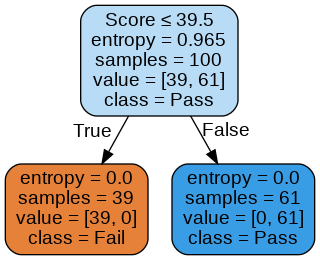

In [0]:
plot_decision_tree(clf, X_train.columns,["Fail", "Pass"])


In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = classifier.predict(X_train)


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_train, y_pred))
print(classification_report(Y_train, y_pred))

[[39  0]
 [ 0 61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        61

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("/content/titanic_train.csv")
print(train.shape)

(891, 12)


In [9]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [11]:
# At this point we will drop the Cabin feature since it is missing a lot of the data
train.pop("Cabin")
train.pop("Name")
train.pop("Ticket")
train.shape

(891, 9)

In [0]:

# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [0]:

# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Pclass'] = train['Pclass'].apply(str)

# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
 for_dummy = train.pop(col)
 train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [0]:
labels = train.pop('Survived')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = dt.predict(x_test)

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7409558579488882

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

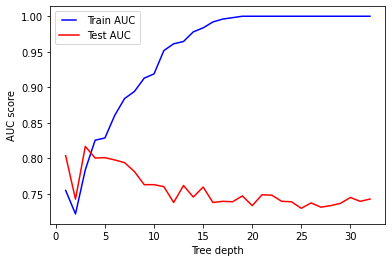

In [26]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1,= plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


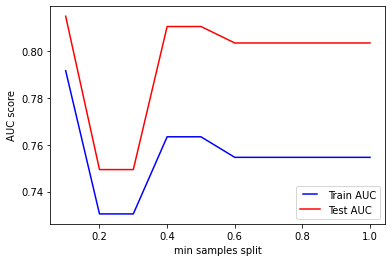

In [28]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

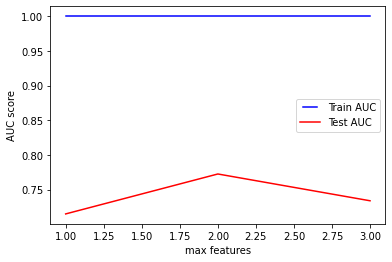

In [31]:

max_features = list(range(1,4))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()


In [36]:
##With Hyper Parameters Tuning
#2-1,DesicionTree
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 123}
Accuracy: 0.8116591928251121
Confusion Metrix:
 [[122  33]
 [  9  59]]
